# Assignment 17 : Support Vector Machine (SVM)

## Objective :

Building  model using  support vector machine algorithm , for the given dataset.

## Task 1 : Exploratory Data Analysis (EDA)

In [1]:
# Import necessary libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load the data set.

data = pd.read_csv("mushroom.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [6]:
data.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [7]:
data.shape

(2000, 26)

In [8]:
# Determing the null values.
data.isna().sum().sum()

0

In [9]:
# Verifying if there any duplicate rows exists.
data.duplicated().sum()

1024

In [10]:
# Removing the duplicated rows.
data.drop_duplicates(inplace = True)

In [11]:
data.shape

(976, 26)

In [12]:
data.duplicated().sum()

0

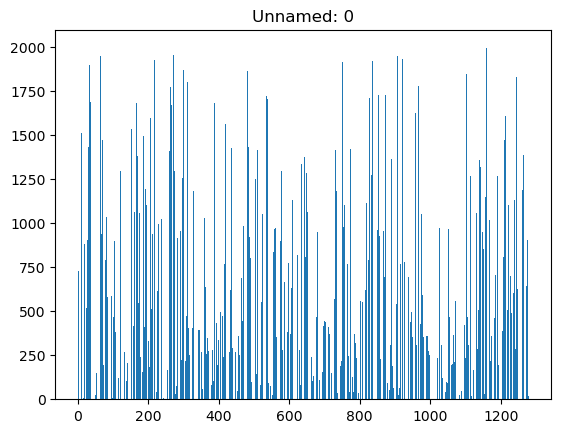

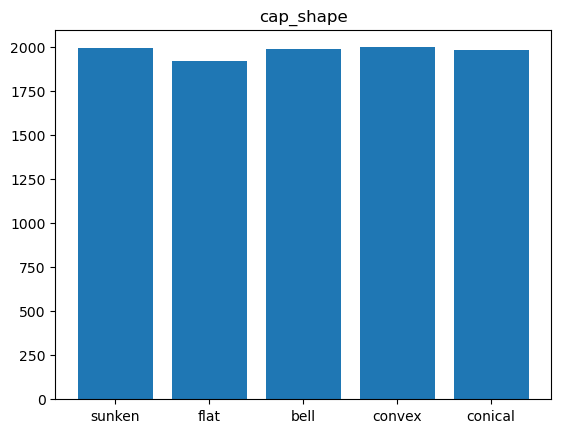

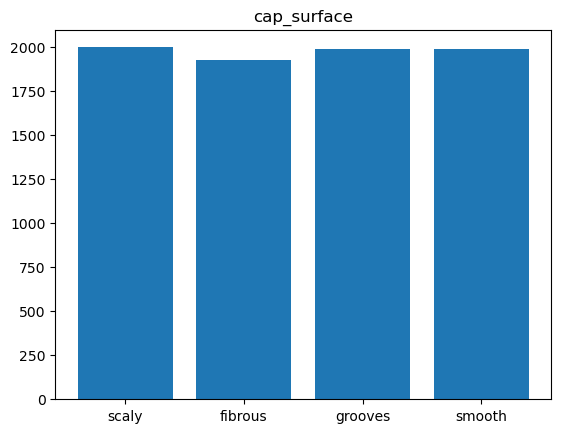

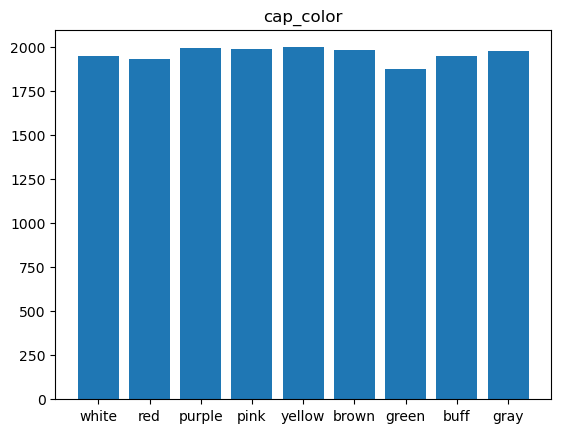

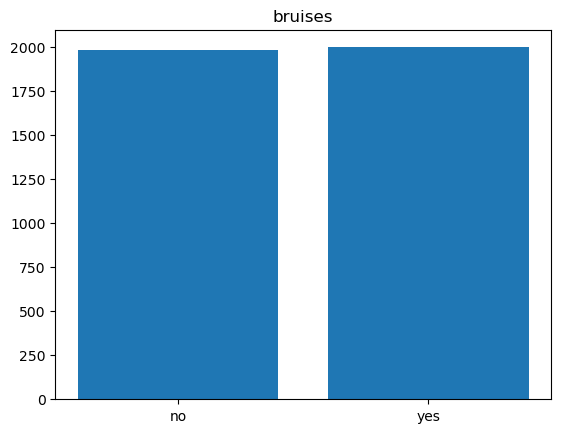

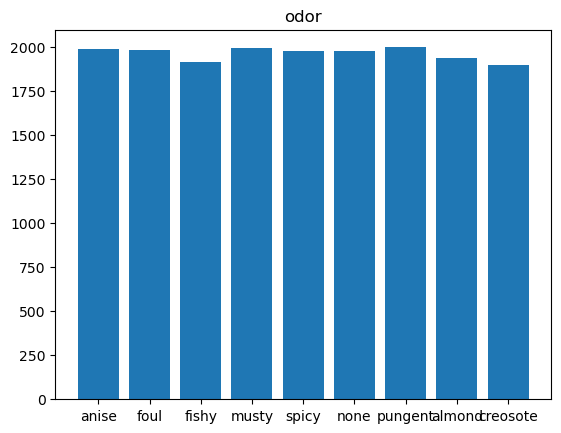

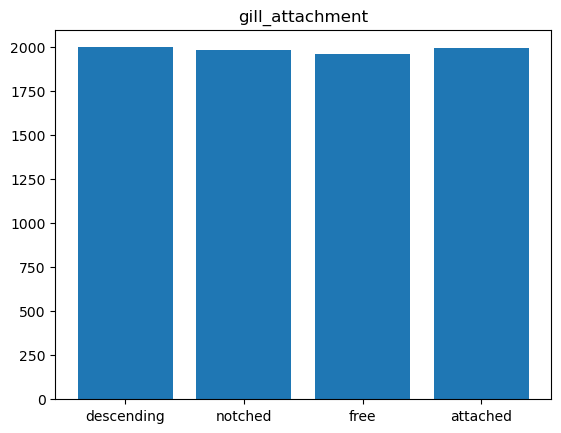

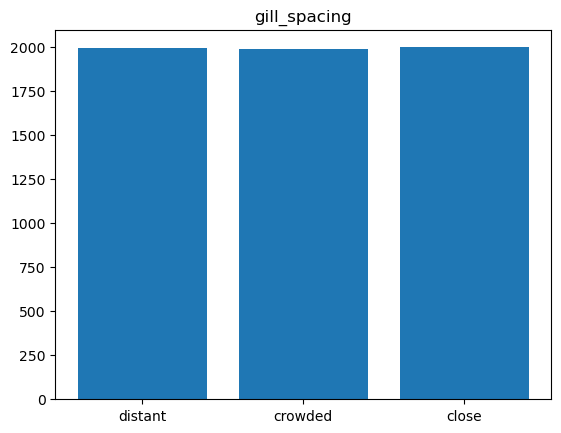

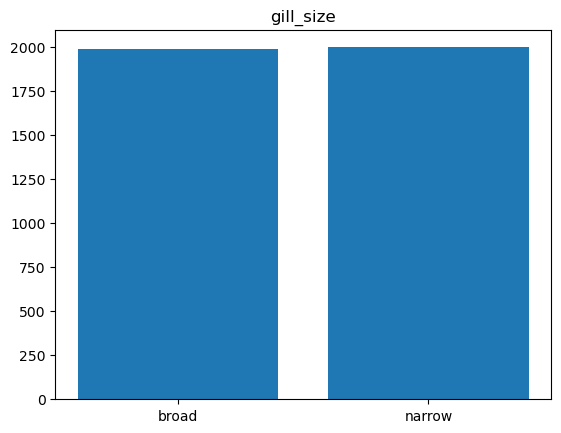

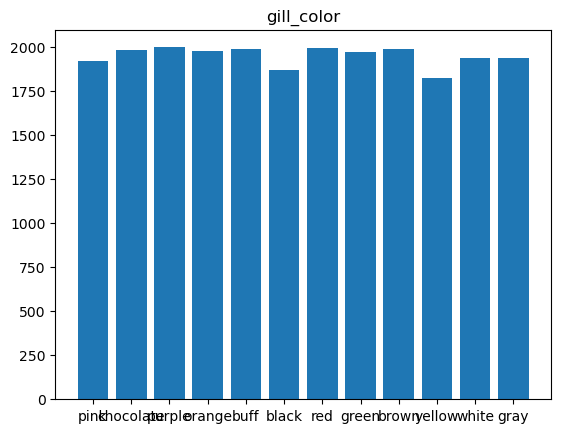

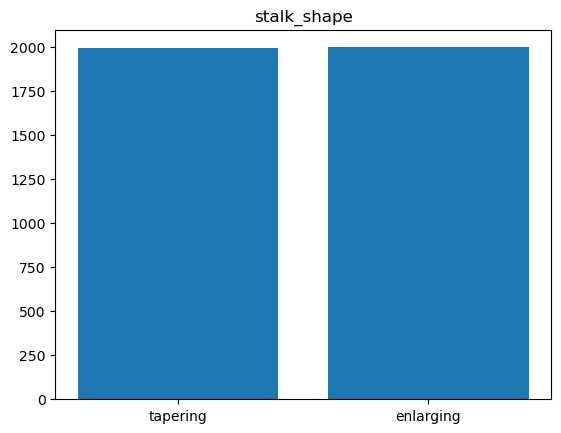

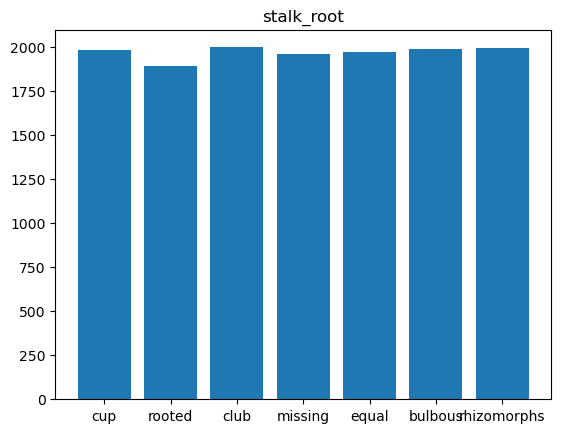

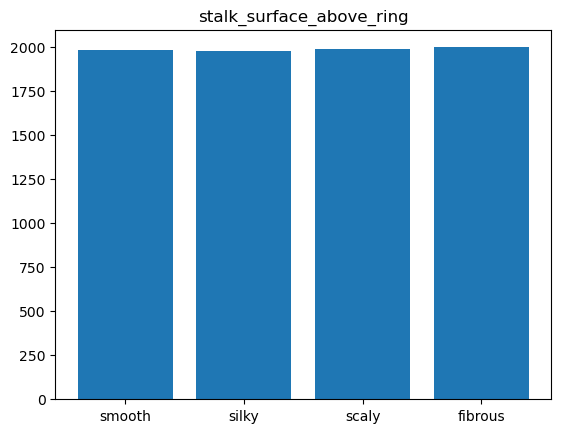

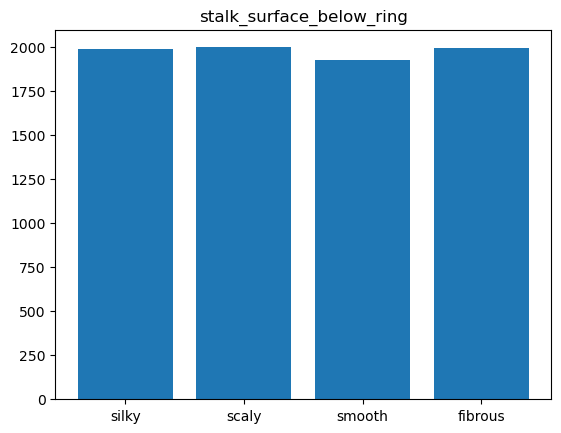

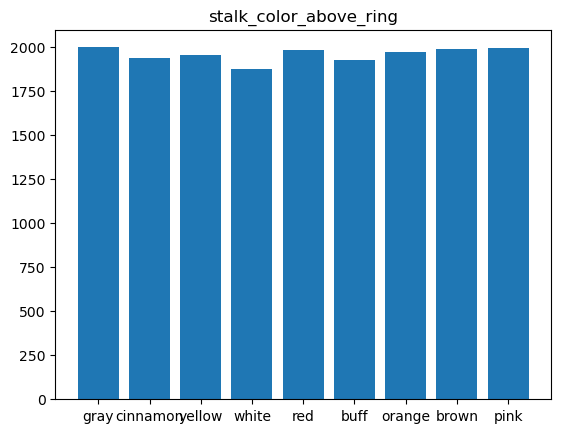

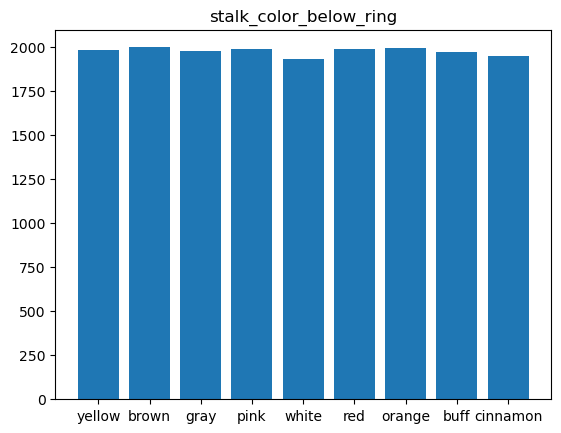

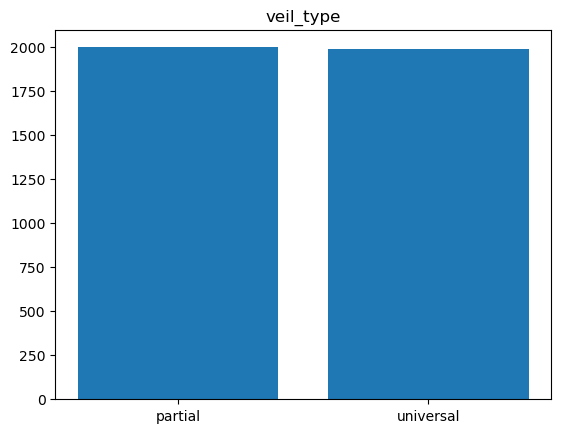

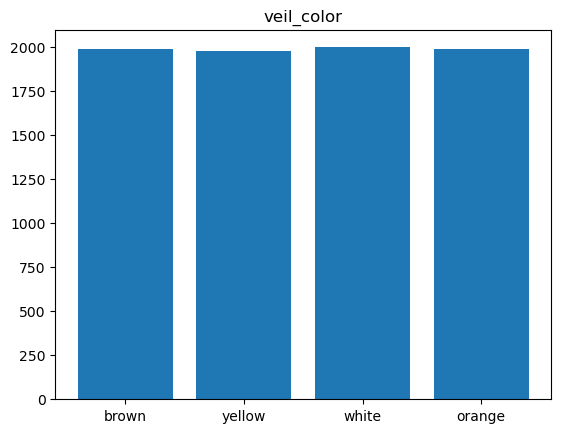

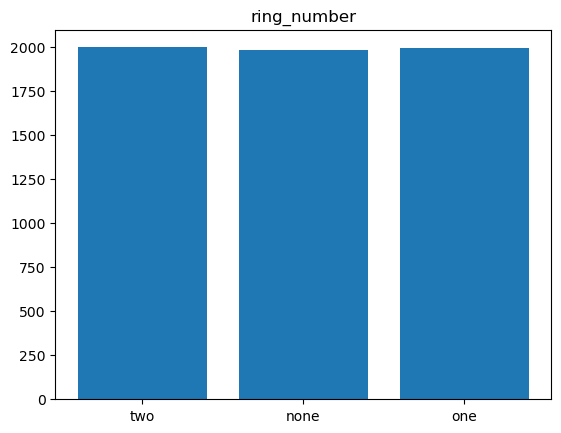

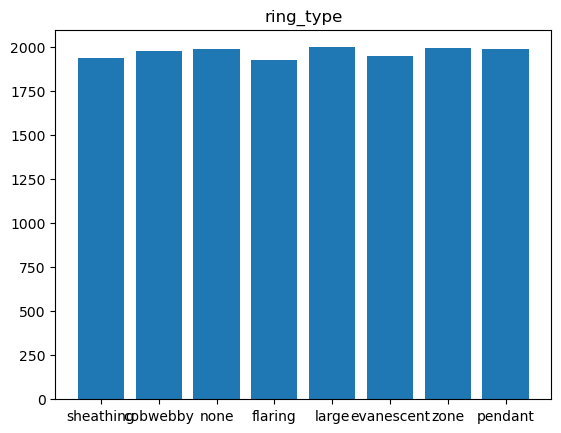

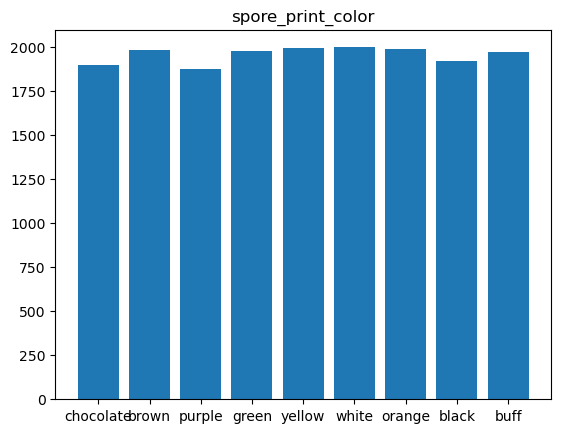

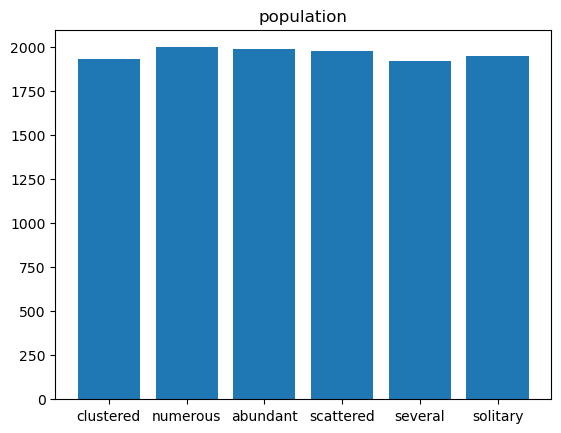

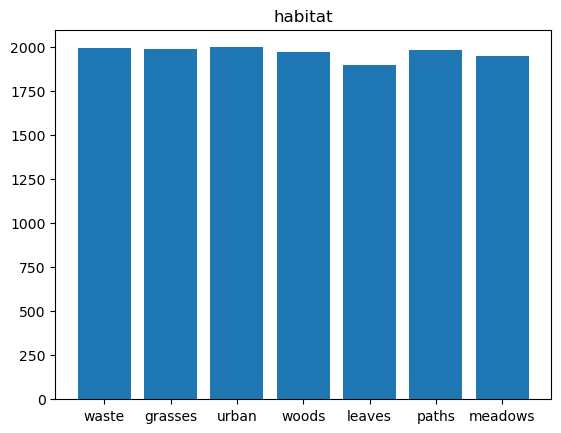

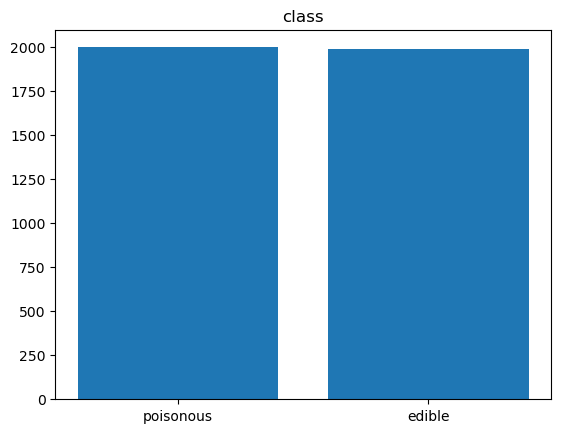

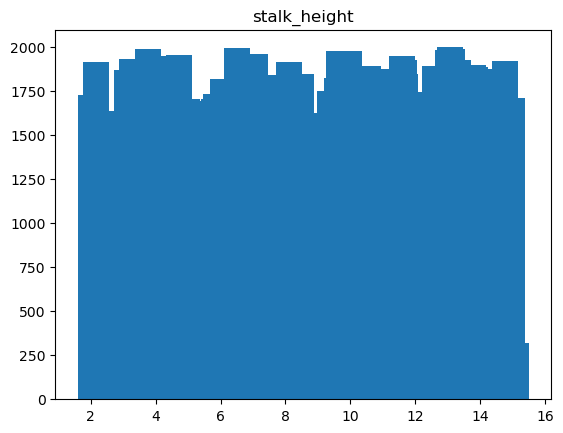

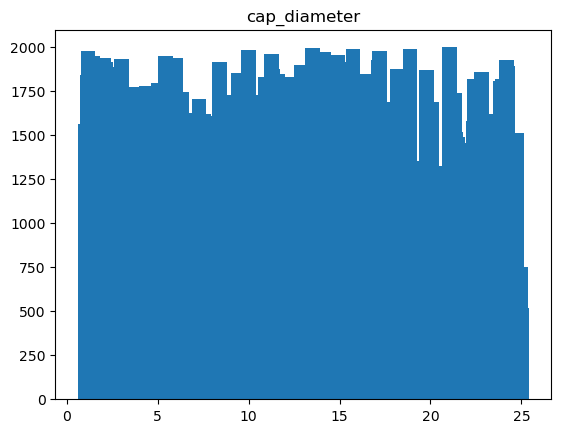

In [13]:
# The duplicated rows are delted.

# Plotting boxplot

for column in data.columns:
    plt.bar(data[column],data.index)
    plt.title(column)
    plt.show()

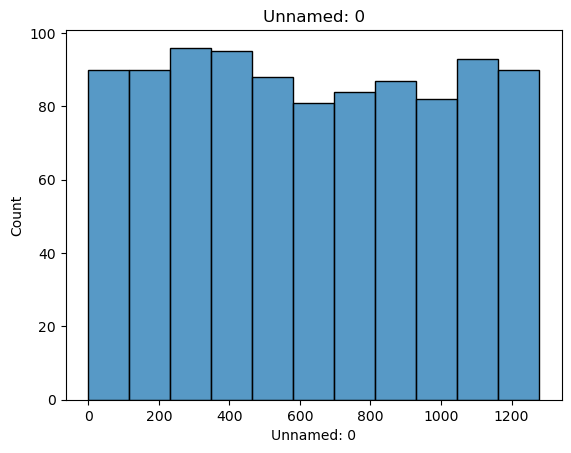

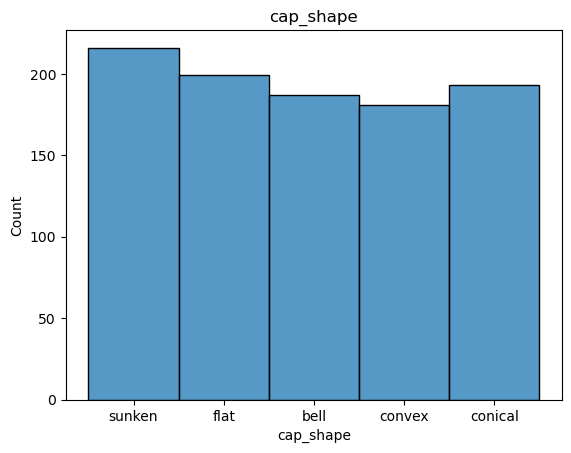

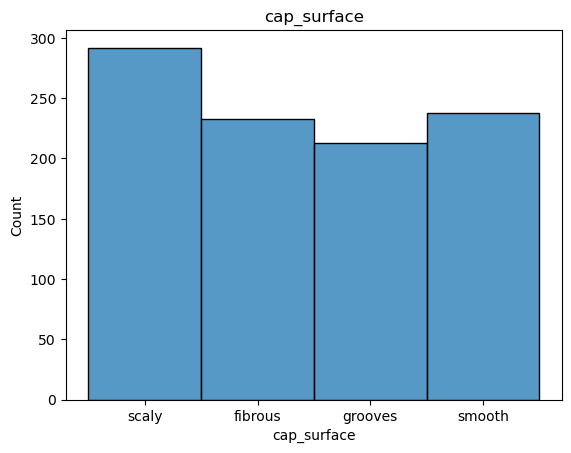

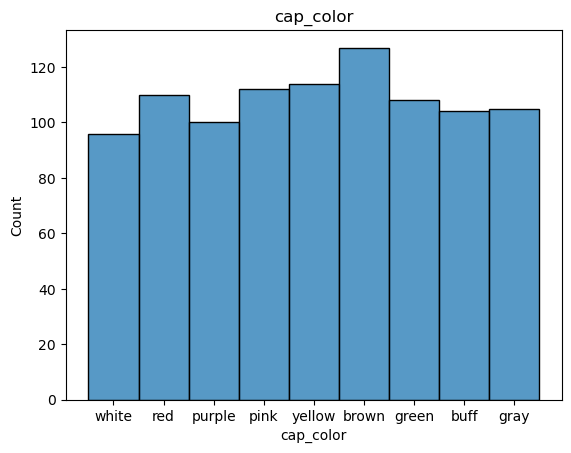

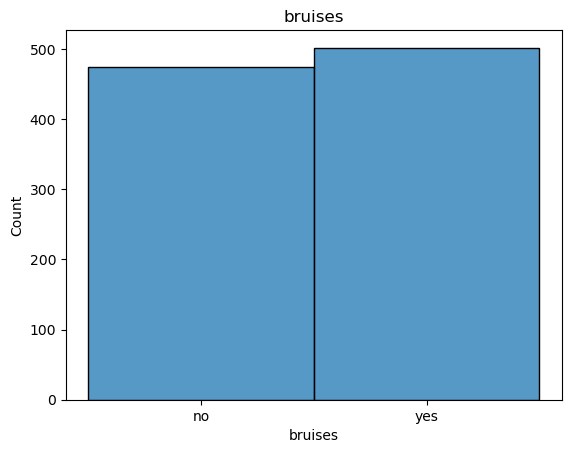

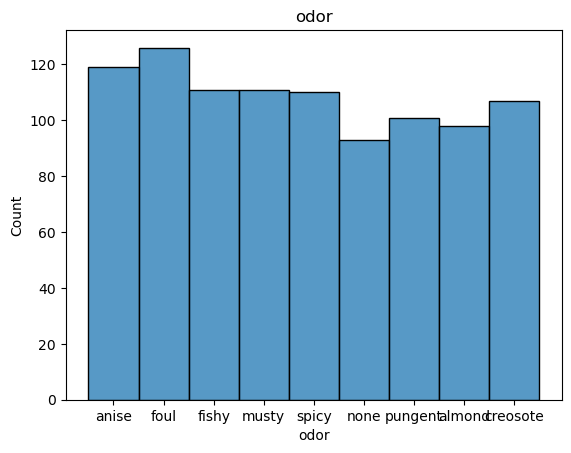

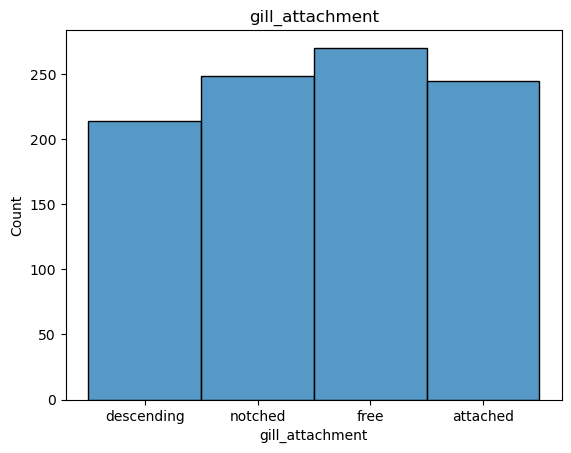

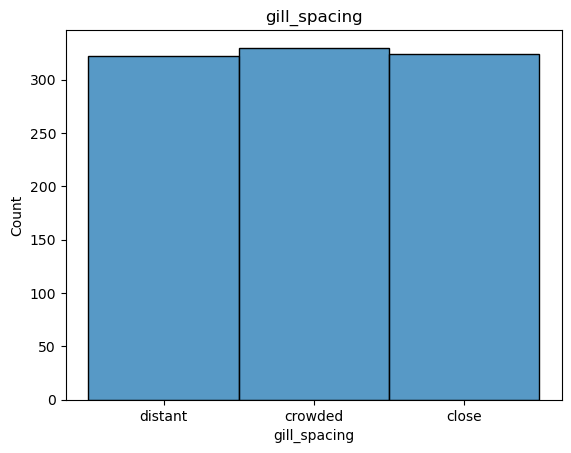

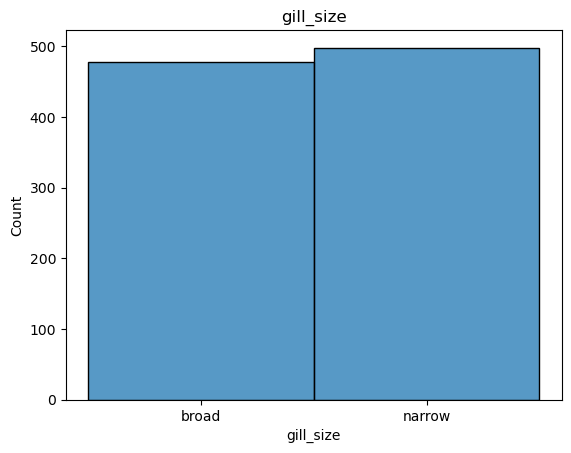

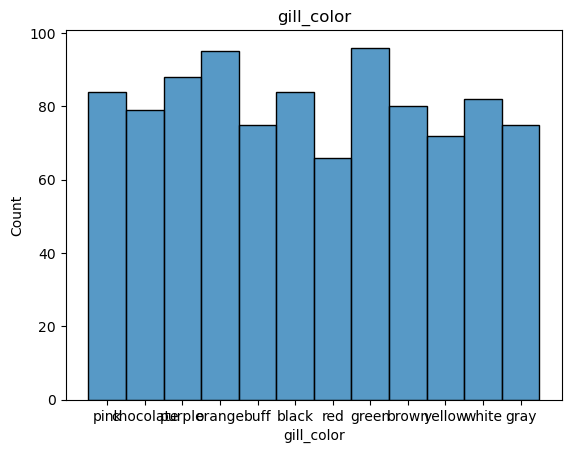

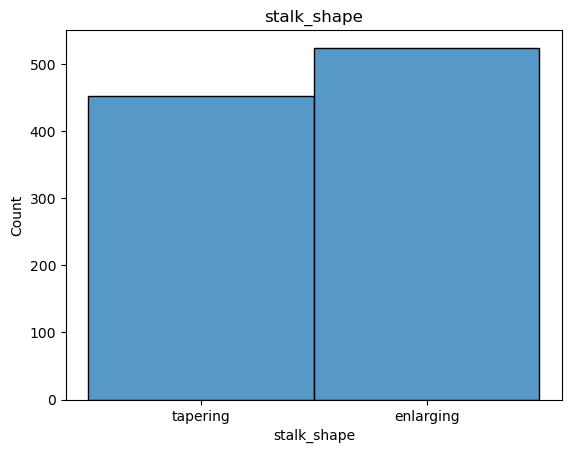

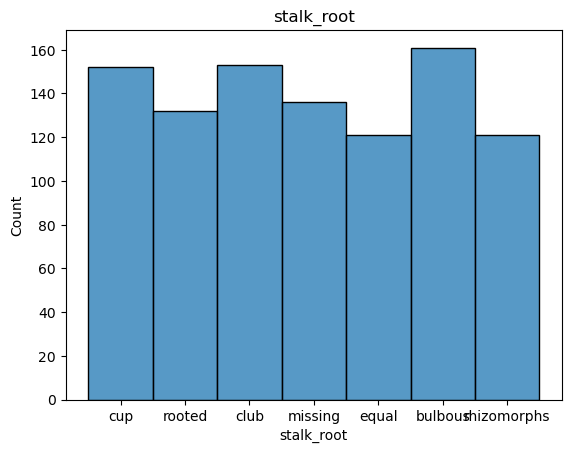

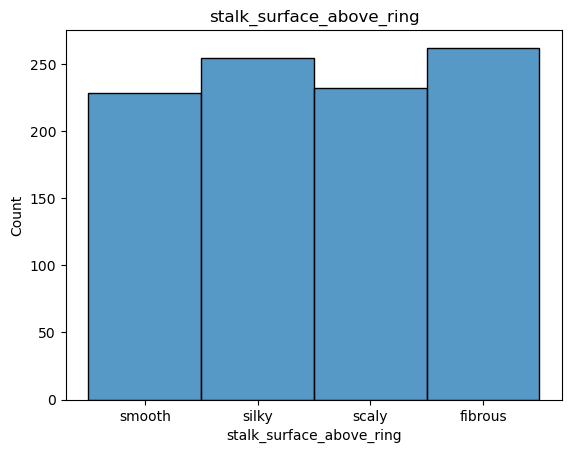

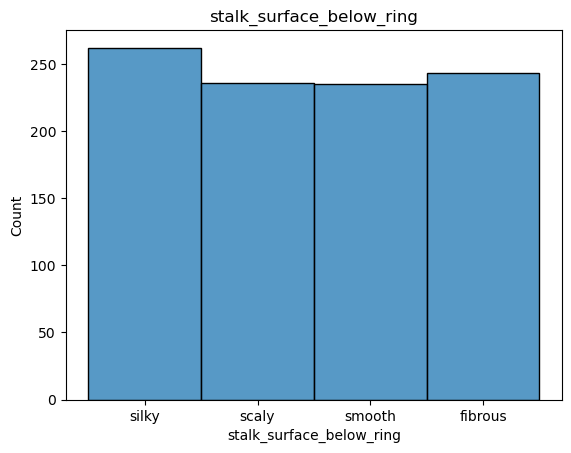

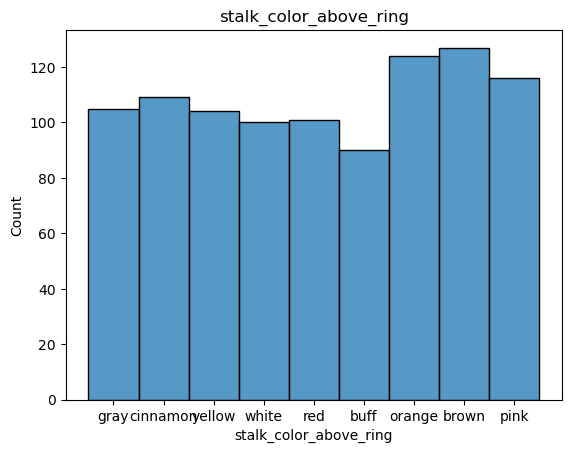

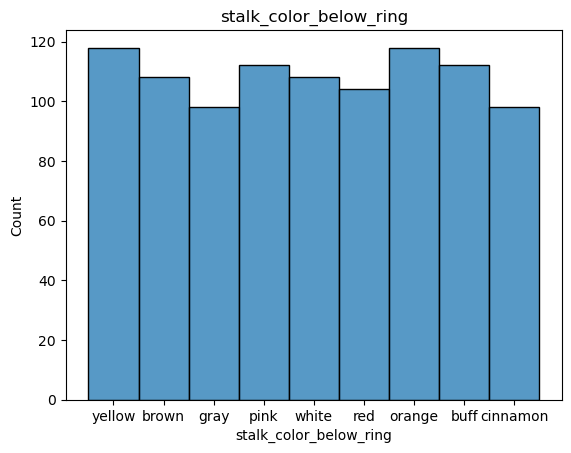

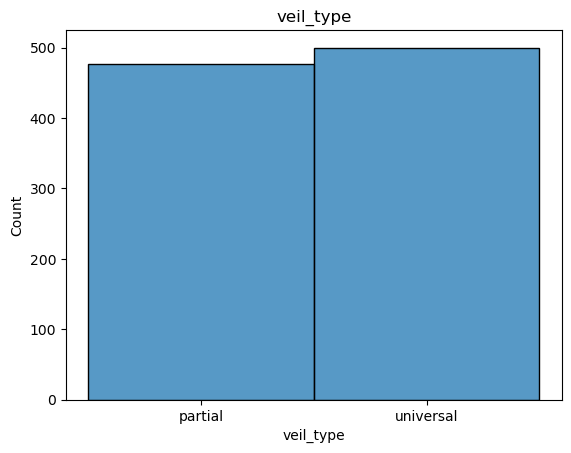

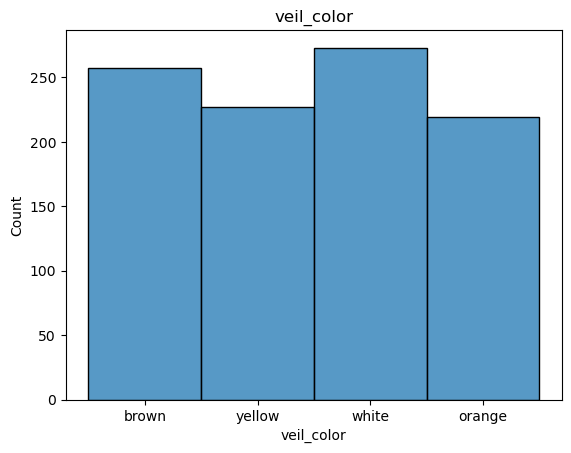

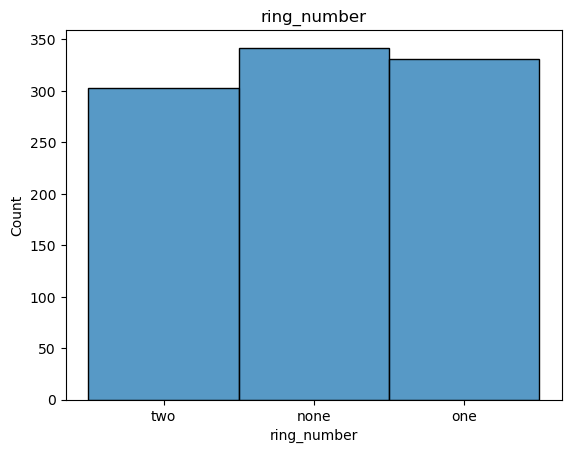

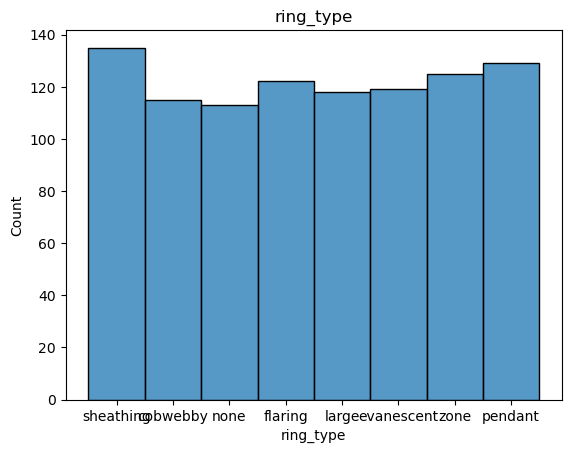

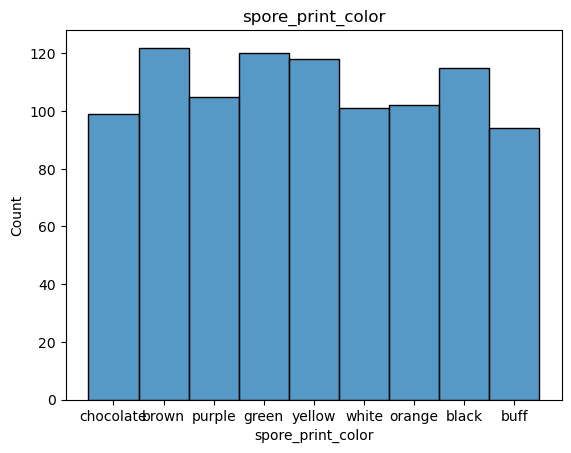

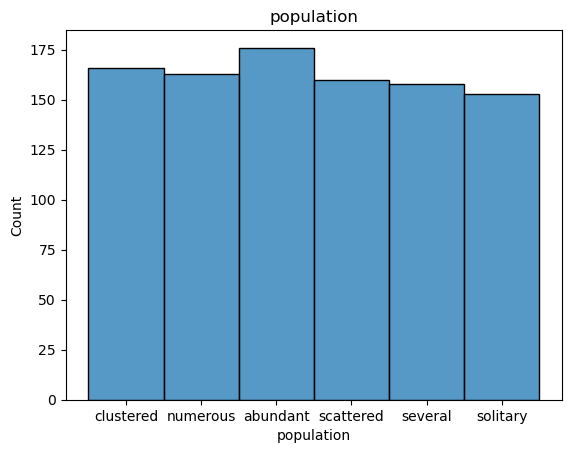

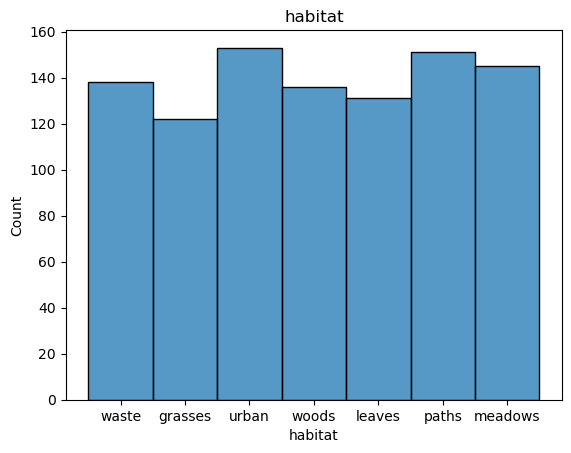

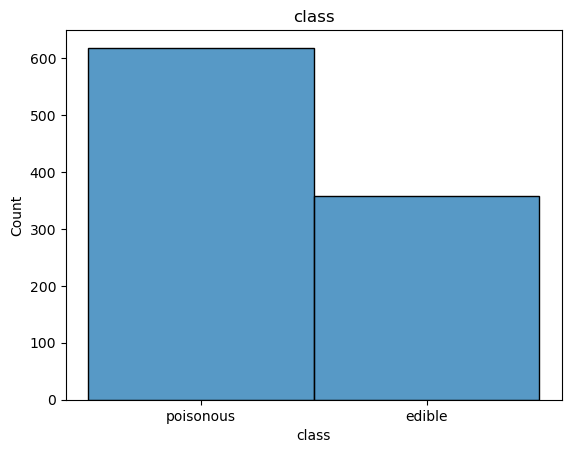

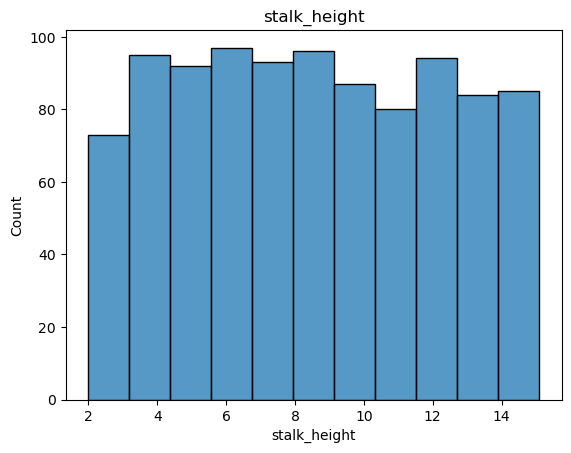

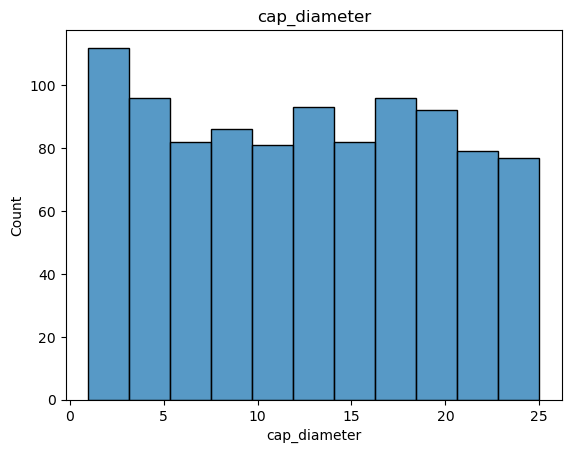

In [115]:
for column in data.columns:
    sns.histplot(data[column])
    plt.title(column)
    plt.show()

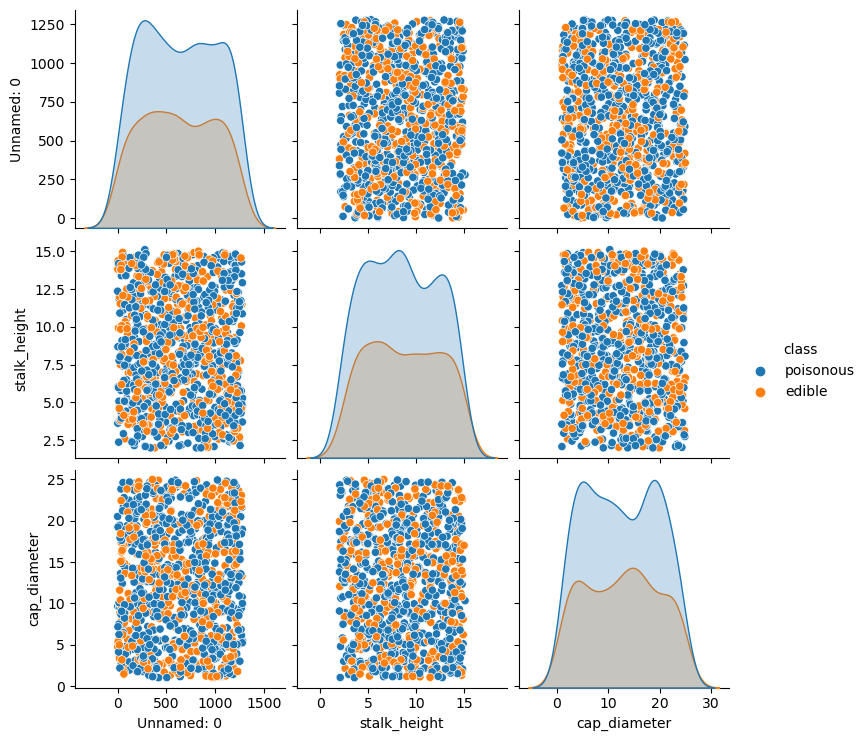

In [116]:
# Pair plot to visualize the correlation;
sns.pairplot(data,hue="class")

## Task 2 : Data Preprocessing

In [14]:
data.reset_index(inplace=True)

In [15]:
# Converting the categorical data into numerical data.

for column in data.columns:
    if data[column].dtype  == "O":
        print(f"Unique Class in {column} are : {data[column].unique()}")
        print("***************************************")

Unique Class in cap_shape are : ['sunken' 'flat' 'bell' 'convex' 'conical']
***************************************
Unique Class in cap_surface are : ['scaly' 'fibrous' 'grooves' 'smooth']
***************************************
Unique Class in cap_color are : ['white' 'red' 'purple' 'pink' 'yellow' 'brown' 'green' 'buff' 'gray']
***************************************
Unique Class in bruises are : ['no' 'yes']
***************************************
Unique Class in odor are : ['anise' 'foul' 'fishy' 'musty' 'spicy' 'none' 'pungent' 'almond'
 'creosote']
***************************************
Unique Class in gill_attachment are : ['descending' 'notched' 'free' 'attached']
***************************************
Unique Class in gill_spacing are : ['distant' 'crowded' 'close']
***************************************
Unique Class in gill_size are : ['broad' 'narrow']
***************************************
Unique Class in gill_color are : ['pink' 'chocolate' 'purple' 'orange' 'buff' 'bla

In [16]:
# Dividing the data into X and Y
X = data.drop("class",axis=1)
Y = data["class"]

In [17]:
X.head()


,index,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,0,1167,sunken,scaly,white,no,anise,descending,distant,broad,...,yellow,partial,brown,two,sheathing,chocolate,clustered,waste,14.276173,5.054983
1,1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,...,brown,universal,brown,two,sheathing,brown,numerous,waste,3.952715,19.068319
2,2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,...,gray,universal,yellow,two,sheathing,purple,abundant,waste,9.054265,7.205884
3,3,282,bell,scaly,pink,yes,fishy,notched,close,broad,...,pink,partial,yellow,two,cobwebby,green,clustered,grasses,5.226499,20.932692
4,4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,...,white,universal,white,none,none,yellow,clustered,urban,14.037532,12.545245


In [121]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     976 non-null    int64  
 1   Unnamed: 0                976 non-null    int64  
 2   cap_shape                 976 non-null    object 
 3   cap_surface               976 non-null    object 
 4   cap_color                 976 non-null    object 
 5   bruises                   976 non-null    object 
 6   odor                      976 non-null    object 
 7   gill_attachment           976 non-null    object 
 8   gill_spacing              976 non-null    object 
 9   gill_size                 976 non-null    object 
 10  gill_color                976 non-null    object 
 11  stalk_shape               976 non-null    object 
 12  stalk_root                976 non-null    object 
 13  stalk_surface_above_ring  976 non-null    object 
 14  stalk_surf

In [122]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 976 entries, 0 to 975
Series name: class
Non-Null Count  Dtype 
--------------  ----- 
976 non-null    object
dtypes: object(1)
memory usage: 7.8+ KB


In [18]:
# One-Hot Encoding the independent variables.

X = pd.get_dummies(X,drop_first=True)

In [19]:
X

,index,Unnamed: 0,stalk_height,cap_diameter,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_grooves,cap_surface_scaly,...,population_numerous,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0,1167,14.276173,5.054983,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,1037,3.952715,19.068319,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,2,309,9.054265,7.205884,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,3,282,5.226499,20.932692,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,820,14.037532,12.545245,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,1985,877,13.020616,9.993008,1,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
972,1988,926,3.751597,18.868135,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
973,1989,289,13.134058,15.740028,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
974,1996,1160,6.500840,13.501957,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0


In [125]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Columns: 106 entries, index to habitat_woods
dtypes: float64(2), int64(2), uint8(102)
memory usage: 127.8 KB


In [20]:
# Hence there are lot of classes in each feature so go with label encoding.

X = data.drop("class",axis=1)

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for column in X.columns:
    if X[column].dtype == "O":
        X[column] = encoder.fit_transform(X[column])
        

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     976 non-null    int64  
 1   Unnamed: 0                976 non-null    int64  
 2   cap_shape                 976 non-null    int32  
 3   cap_surface               976 non-null    int32  
 4   cap_color                 976 non-null    int32  
 5   bruises                   976 non-null    int32  
 6   odor                      976 non-null    int32  
 7   gill_attachment           976 non-null    int32  
 8   gill_spacing              976 non-null    int32  
 9   gill_size                 976 non-null    int32  
 10  gill_color                976 non-null    int32  
 11  stalk_shape               976 non-null    int32  
 12  stalk_root                976 non-null    int32  
 13  stalk_surface_above_ring  976 non-null    int32  
 14  stalk_surf

In [23]:
X.drop("index",axis=1,inplace = True)

In [24]:
Y.unique()

array(['poisonous', 'edible'], dtype=object)

In [25]:
# finding the correlation matrix.
df = pd.concat([X,Y],axis=1)

In [26]:
df.corr()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
Unnamed: 0,1.000000,-0.002662,-0.025126,0.040939,-0.019980,-0.018715,-0.016446,0.043219,0.025476,0.018908,...,-0.006987,0.032241,0.003575,-0.068662,-0.000326,-0.004192,0.007227,0.033891,0.000815,0.042726
cap_shape,-0.002662,1.000000,0.024645,0.020694,-0.007043,-0.035072,0.017091,-0.026279,0.017675,0.050239,...,-0.018025,-0.015447,-0.004381,0.038398,0.012335,0.008641,0.009890,-0.003017,-0.019087,0.015284
cap_surface,-0.025126,0.024645,1.000000,0.010129,-0.013355,-0.001229,-0.008412,0.033273,-0.046493,0.033423,...,-0.003789,-0.042954,0.027026,0.005017,0.002838,-0.057301,-0.026943,-0.038786,0.026016,0.030579
cap_color,0.040939,0.020694,0.010129,1.000000,0.007862,-0.056524,0.000201,0.001367,0.034965,0.005884,...,-0.007788,-0.008664,-0.027817,0.037536,0.023527,0.045805,-0.039548,-0.006857,0.026948,0.006289
bruises,-0.019980,-0.007043,-0.013355,0.007862,1.000000,0.051111,0.006422,-0.017566,-0.004689,-0.033166,...,-0.088043,0.007497,-0.023444,-0.037722,-0.067596,-0.028591,0.014990,0.011681,0.067729,-0.049061
odor,-0.018715,-0.035072,-0.001229,-0.056524,0.051111,1.000000,-0.013212,-0.030698,-0.057671,-0.030782,...,0.014668,0.022875,0.033718,-0.031397,0.005064,-0.078276,-0.000816,-0.021675,-0.002972,-0.043273
gill_attachment,-0.016446,0.017091,-0.008412,0.000201,0.006422,-0.013212,1.000000,-0.024634,-0.011606,0.026293,...,0.026026,-0.044643,-0.005227,0.048239,-0.049124,-0.020564,0.003722,-0.020783,-0.002778,-0.012882
gill_spacing,0.043219,-0.026279,0.033273,0.001367,-0.017566,-0.030698,-0.024634,1.000000,0.012648,-0.004135,...,-0.002366,-0.027653,-0.003433,0.009182,0.008323,0.023472,0.005042,0.024691,0.006502,0.034553
gill_size,0.025476,0.017675,-0.046493,0.034965,-0.004689,-0.057671,-0.011606,0.012648,1.000000,-0.022993,...,-0.026424,-0.041509,-0.005179,-0.022972,0.005937,0.033767,0.002667,0.014063,-0.017483,-0.029404
gill_color,0.018908,0.050239,0.033423,0.005884,-0.033166,-0.030782,0.026293,-0.004135,-0.022993,1.000000,...,0.053049,-0.024141,-0.011001,-0.021489,0.019591,0.005718,0.024611,0.014710,0.025211,-0.008795


## Task 3 : Data Visualization

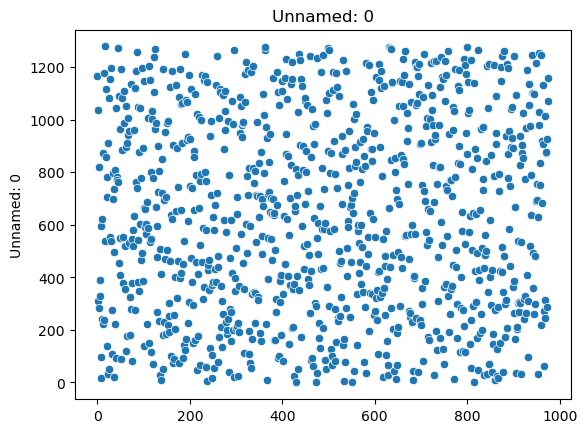

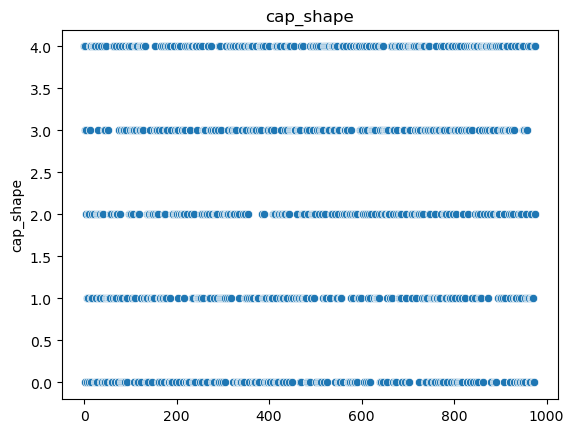

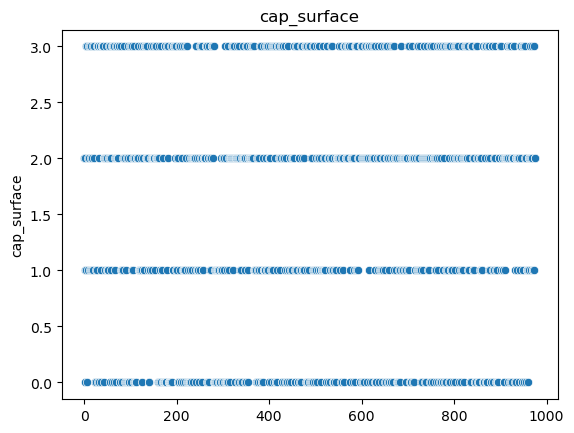

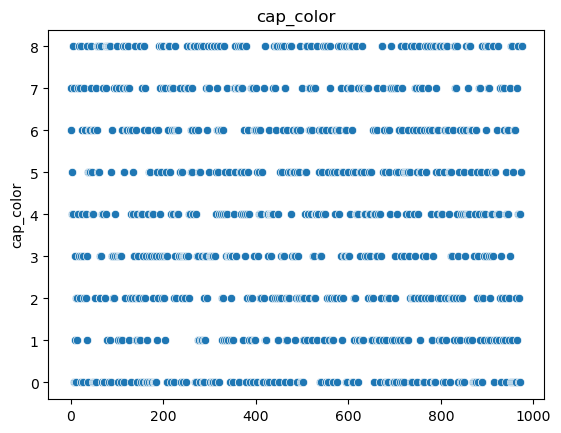

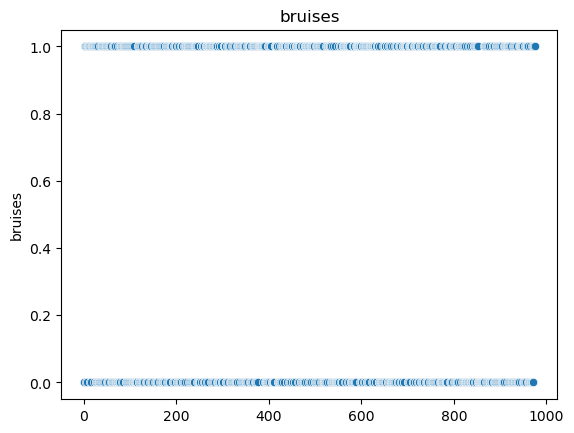

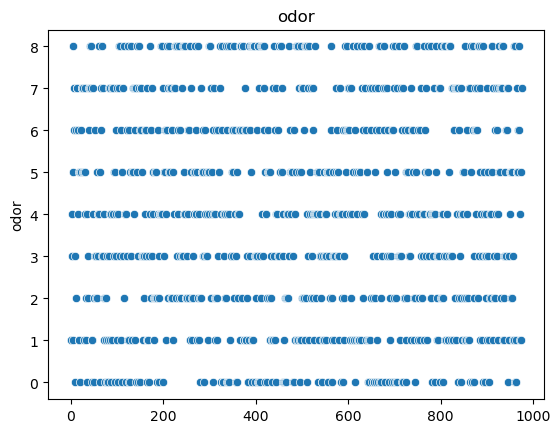

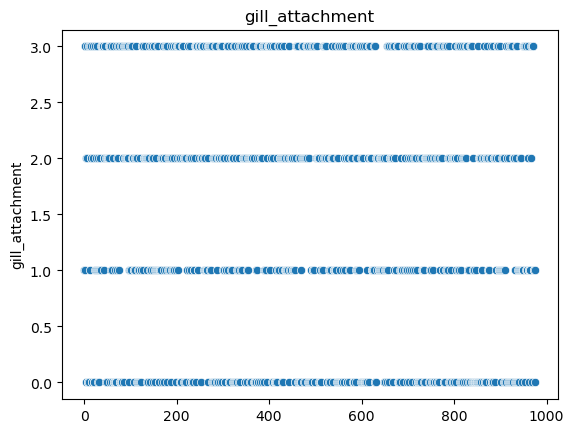

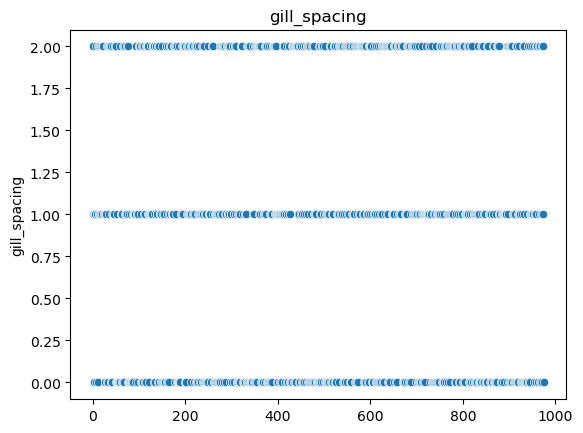

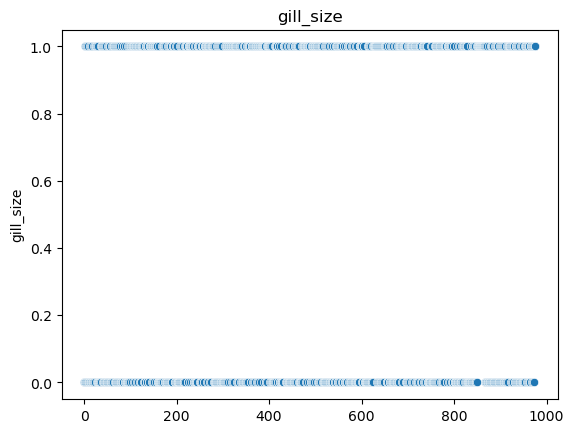

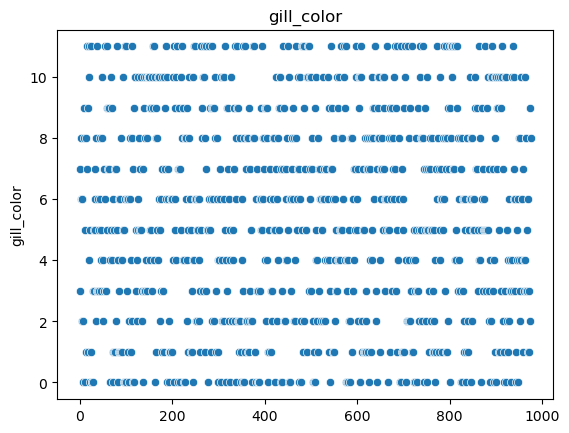

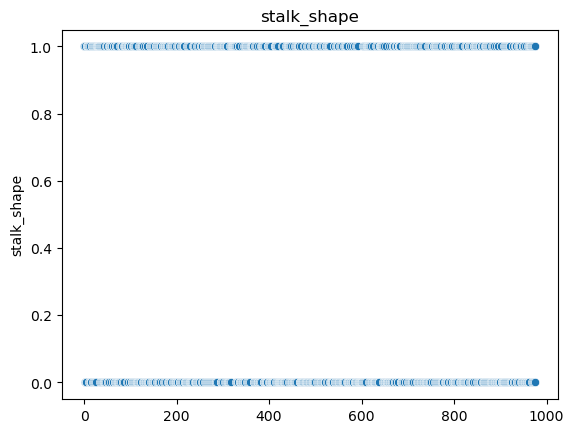

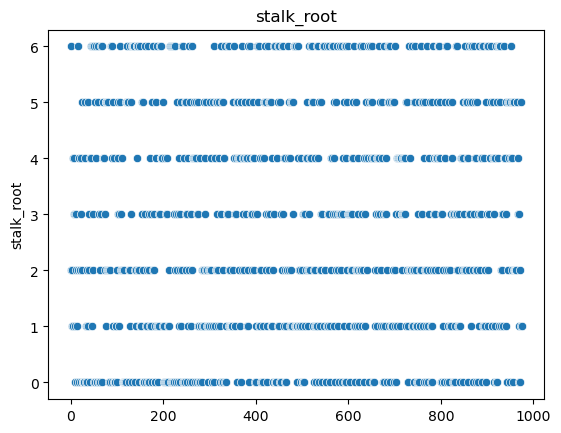

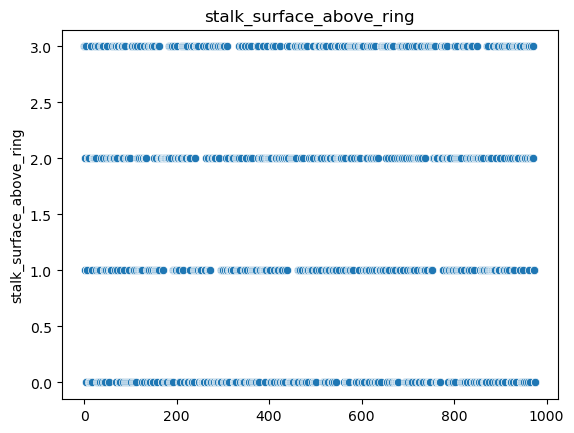

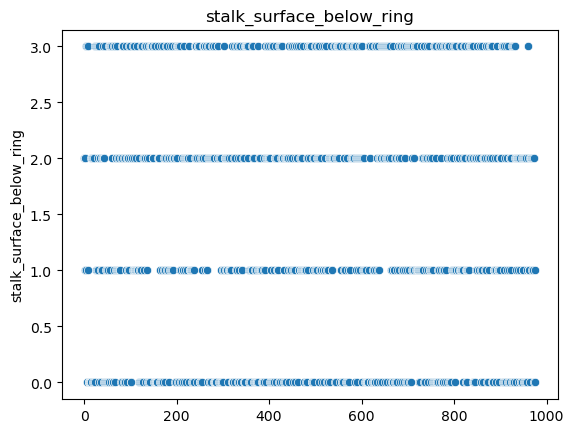

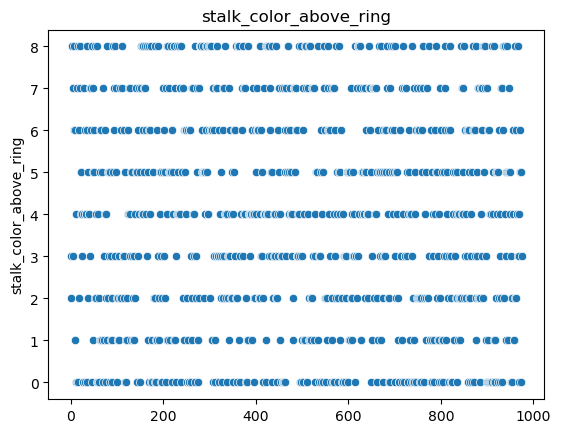

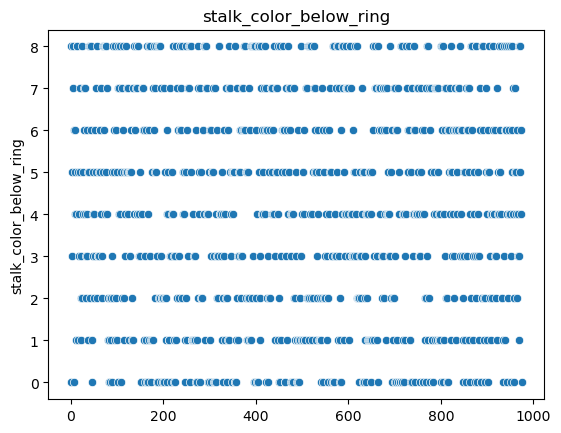

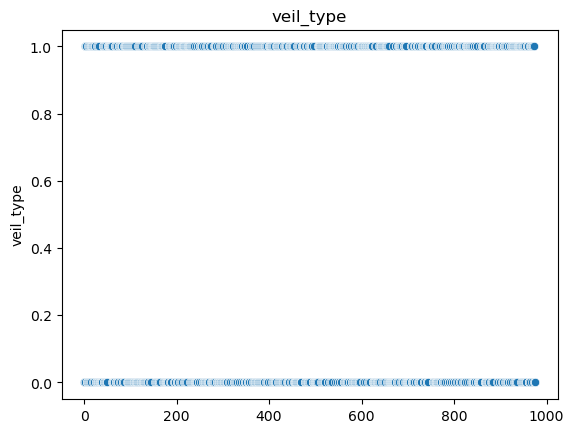

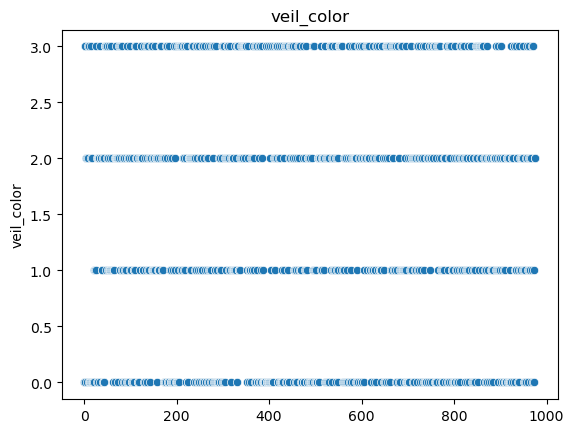

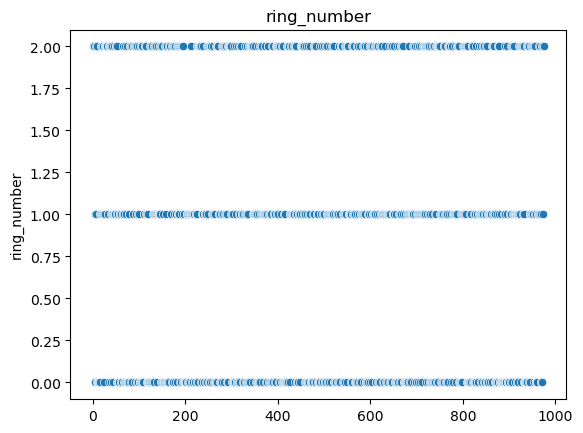

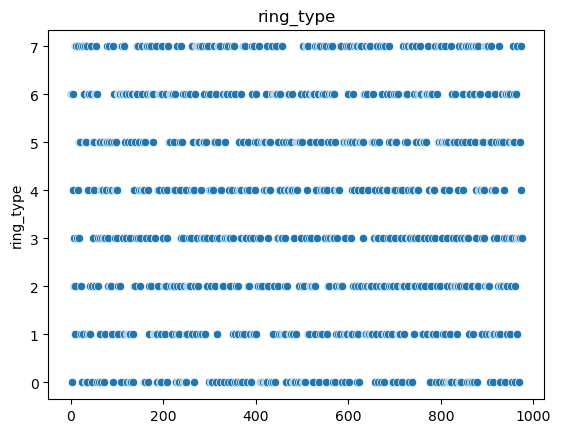

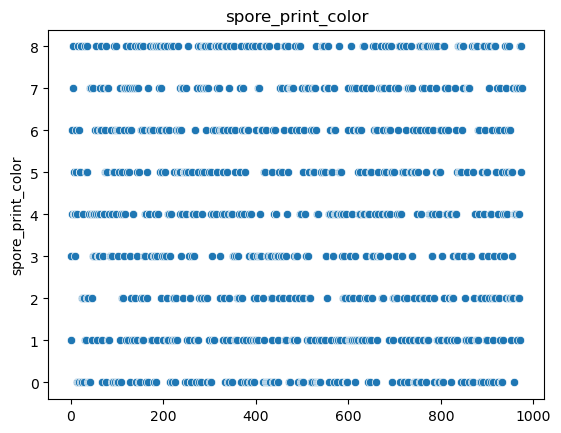

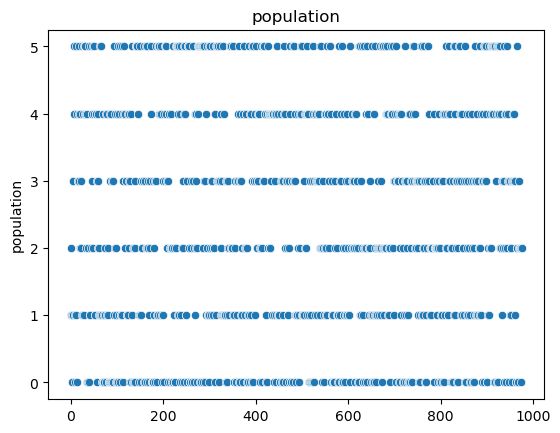

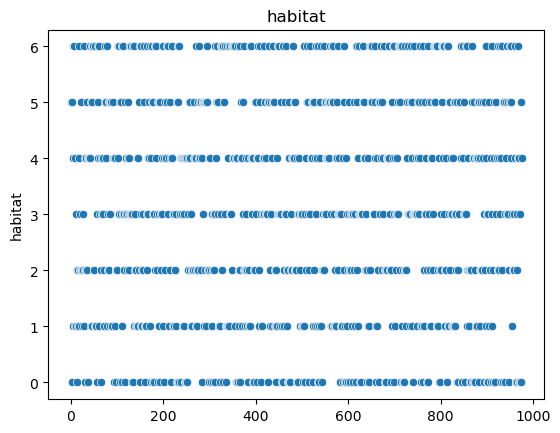

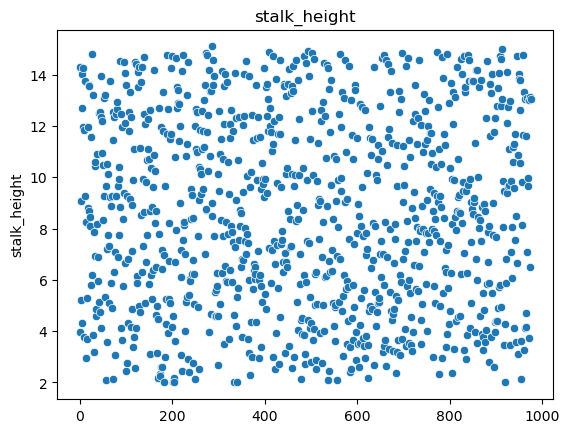

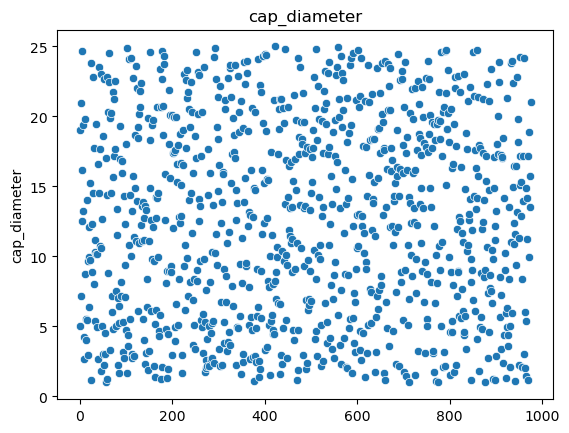

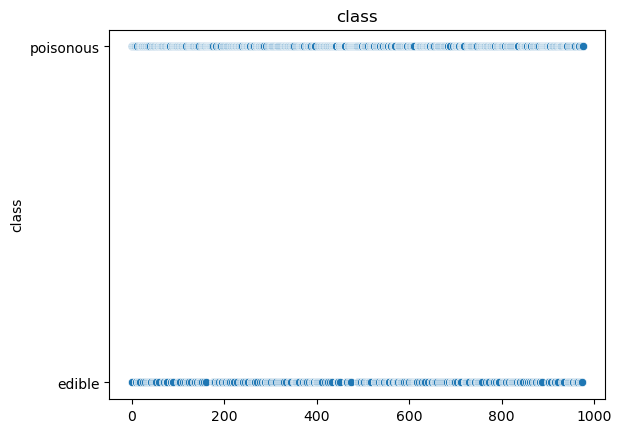

In [133]:
for column in df.columns:
    sns.scatterplot(df[column])
    plt.title(column)
    plt.show()

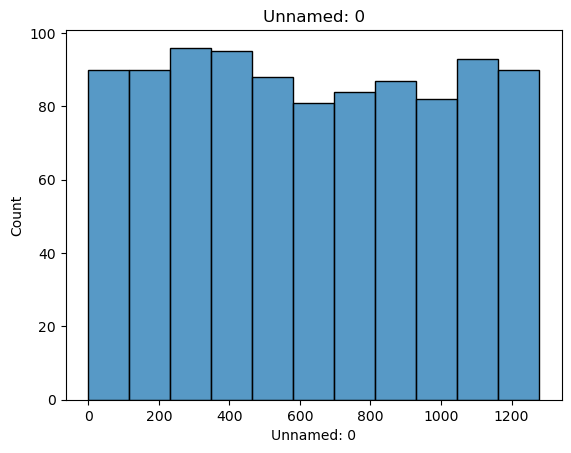

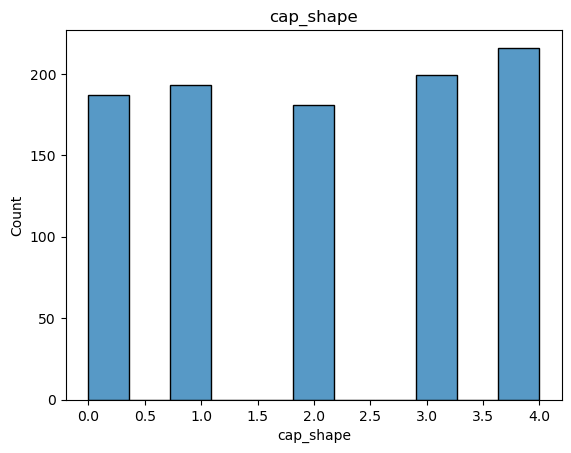

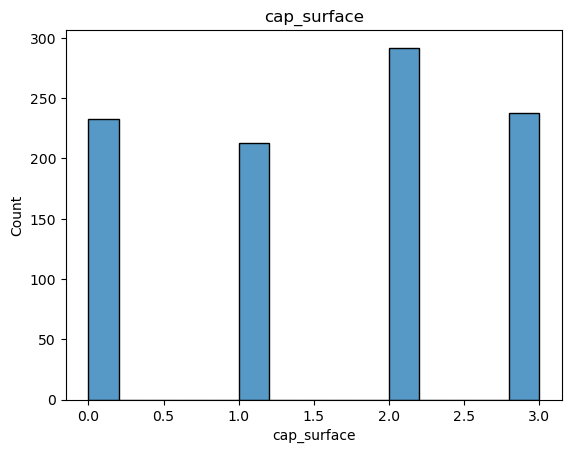

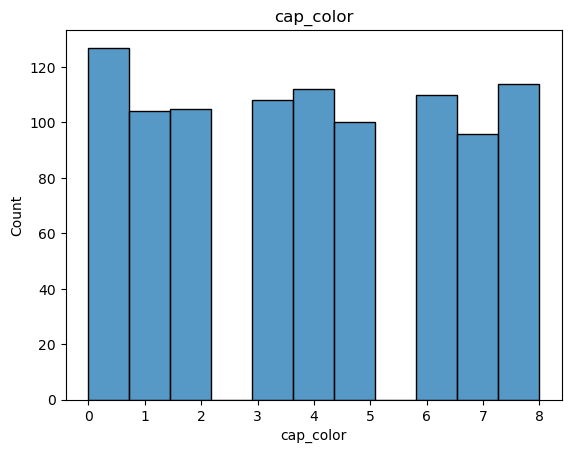

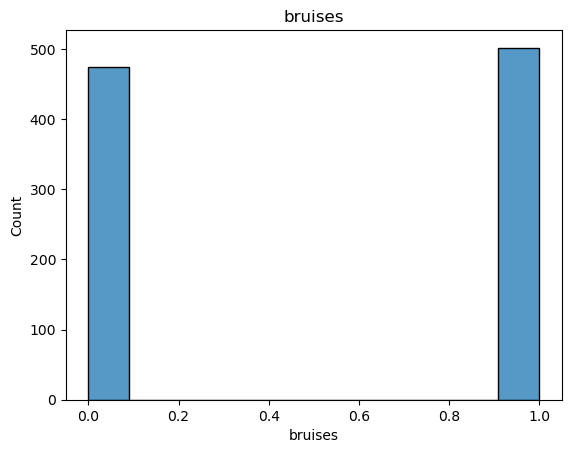

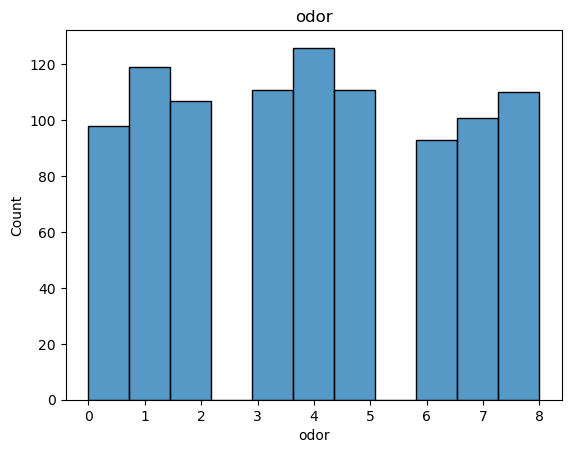

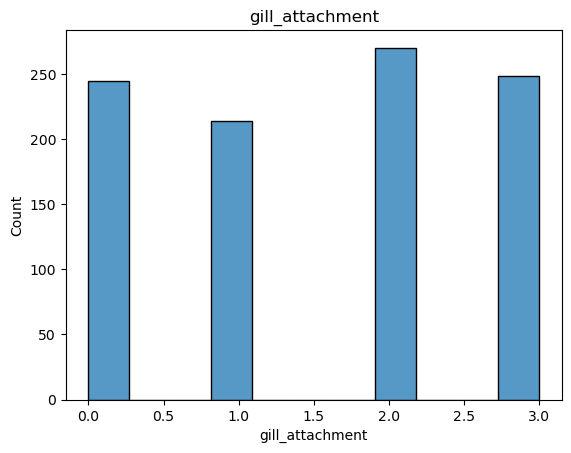

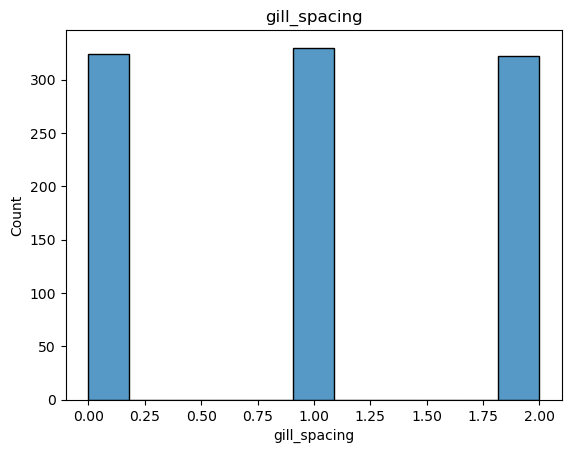

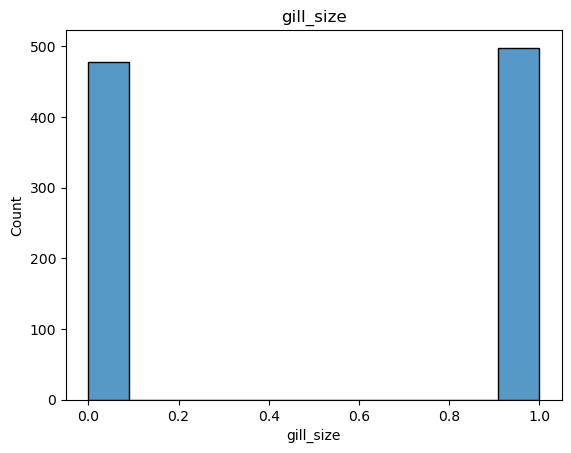

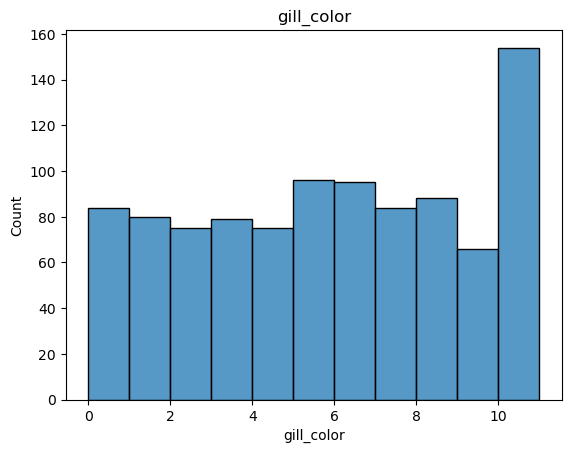

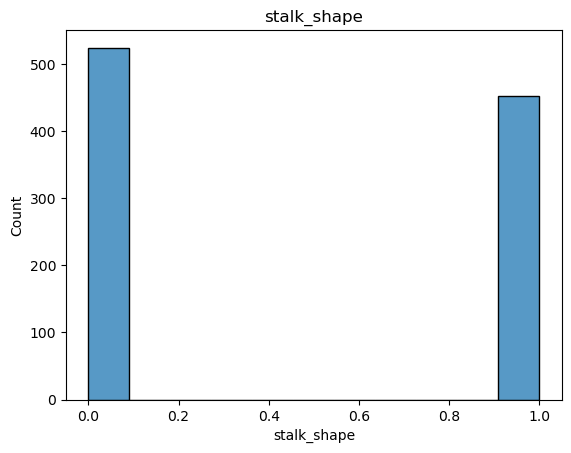

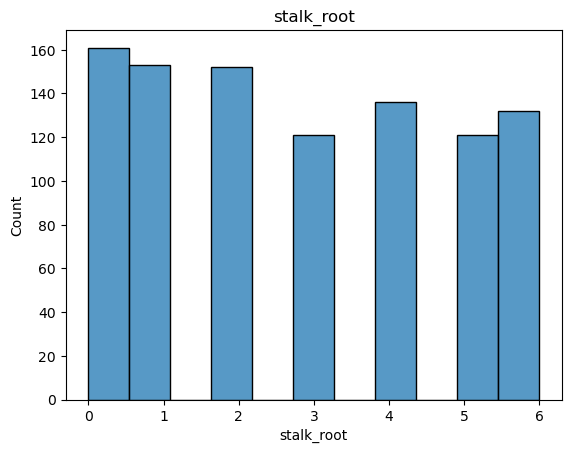

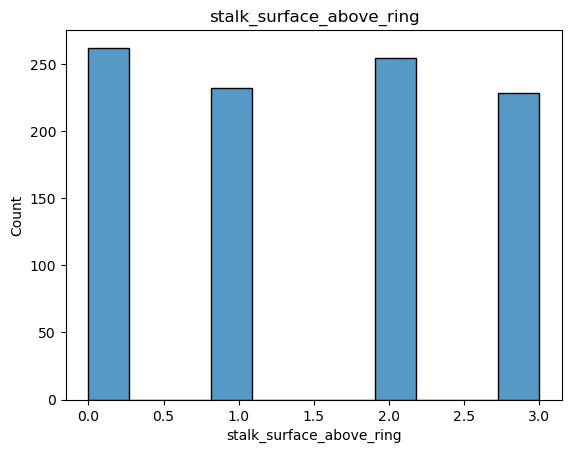

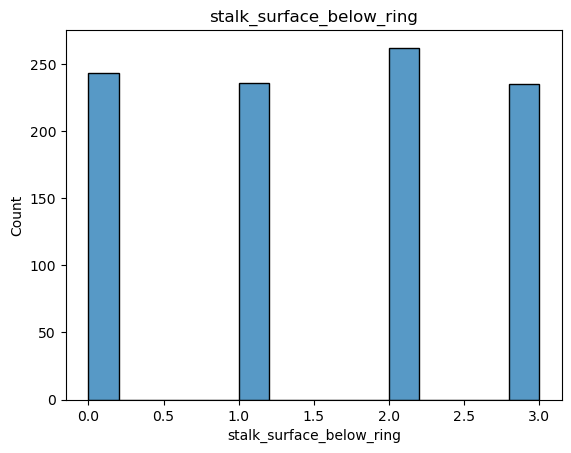

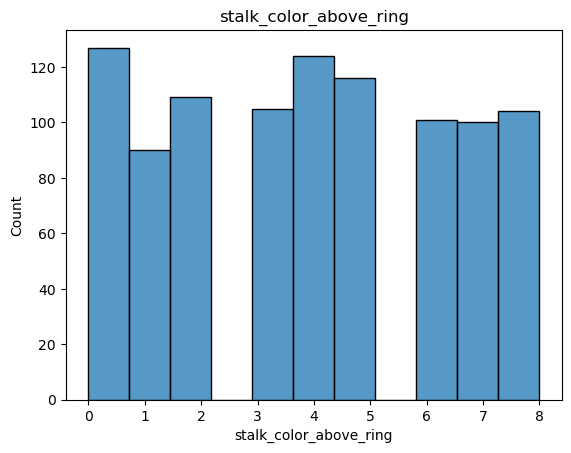

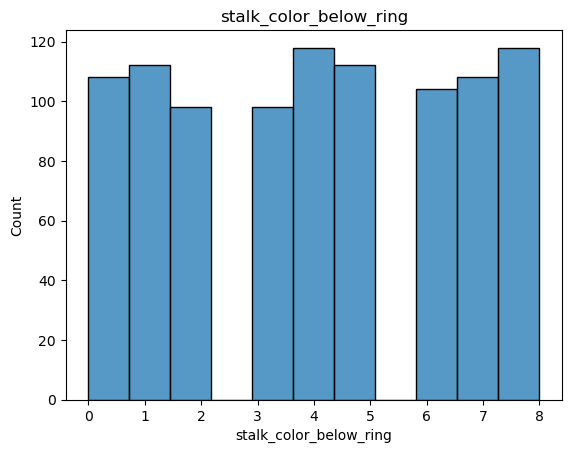

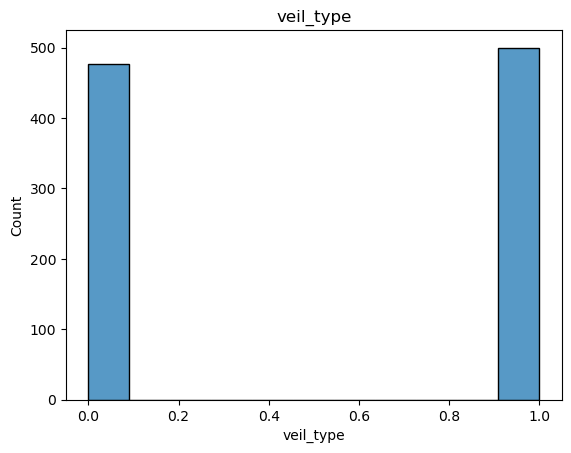

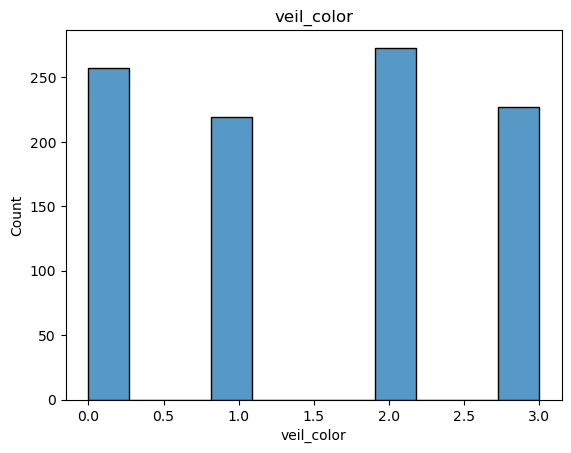

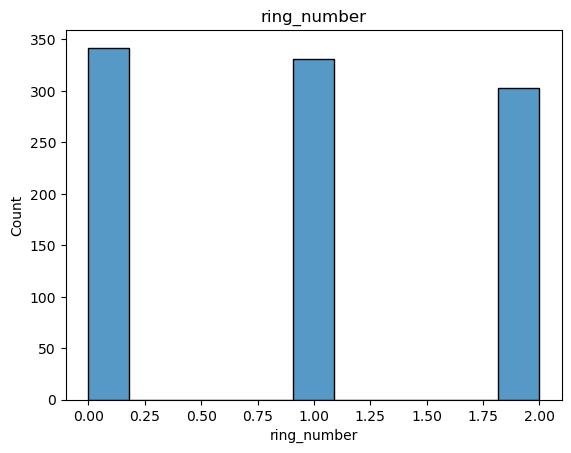

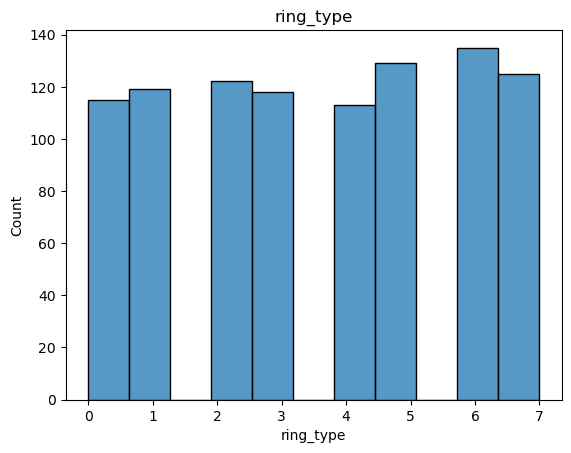

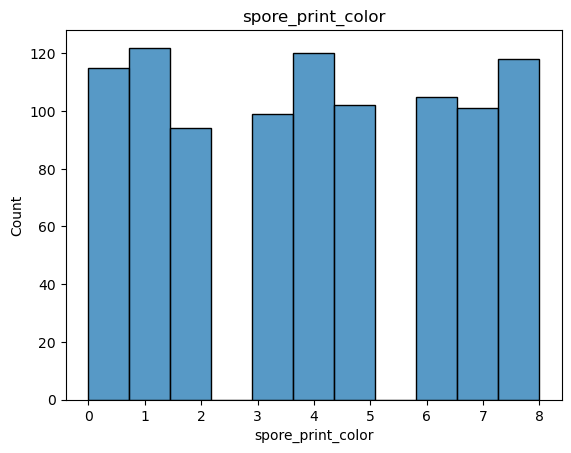

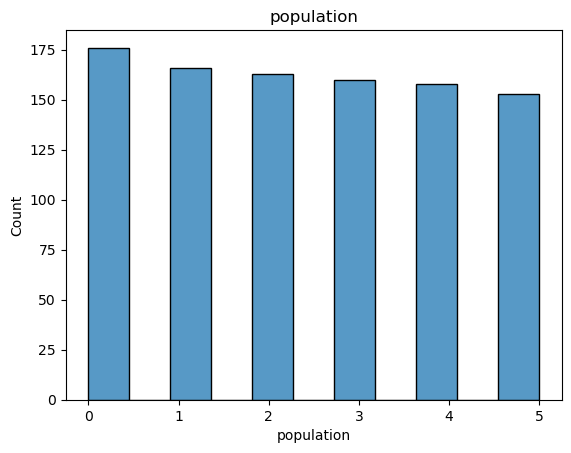

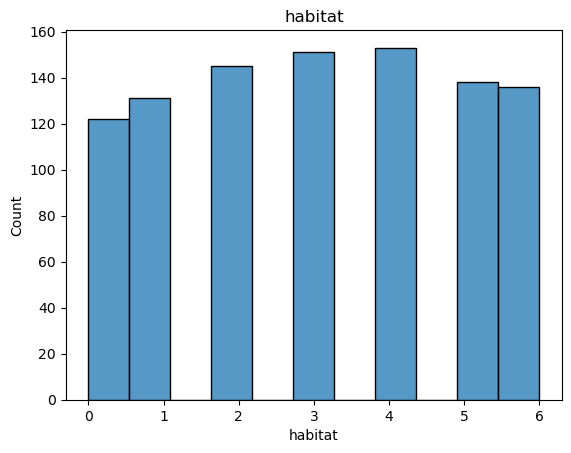

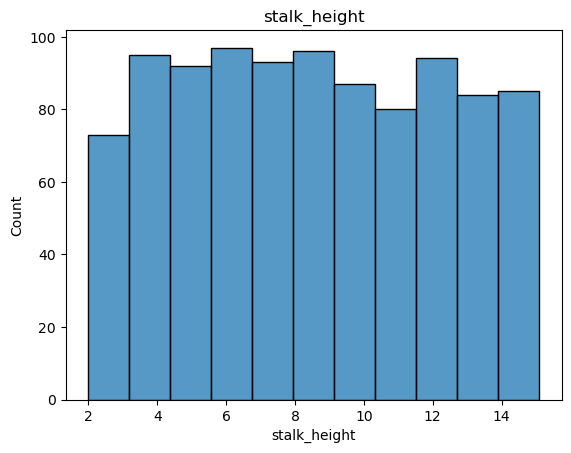

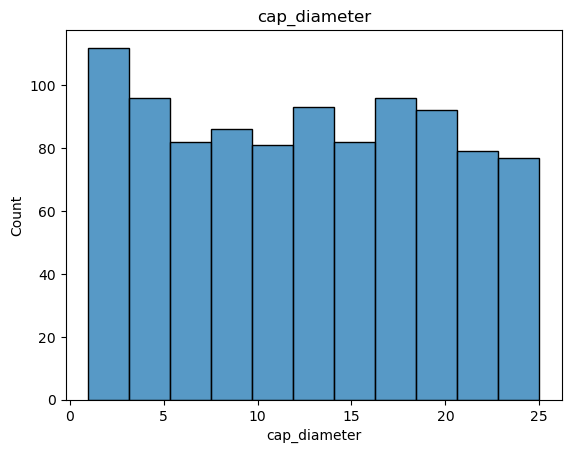

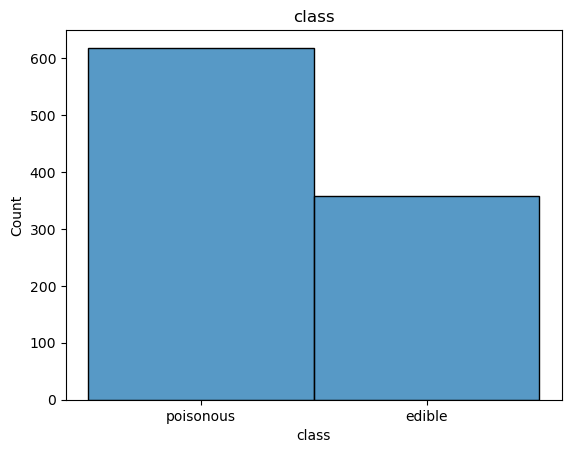

In [134]:
for column in df.columns:
    sns.histplot(df[column])
    plt.title(column)
    plt.show()

In [ ]:
for column in df.columns:
    sns.boxplot(df[column])
    plt.title(column)
    plt.show()

## Task 4 : SVM Implementation

In [27]:
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size = 0.2 , random_state= 7)

In [28]:
print("train_x",train_x.shape)
print("train_y",train_y.shape)
print("test_x",test_x.shape)
print("test_y",test_y.shape)

train_x (780, 25)
train_y (780,)
test_x (196, 25)
test_y (196,)


In [29]:
# loading the dataset to the svc model.

model = SVC(kernel="linear",random_state= 7)
model.fit(train_x,train_y)

SVC(kernel='linear', random_state=7)

## Task 5 : Visualization of SVM Results

In [33]:
from sklearn.metrics import classification_report,accuracy_score,f1_score

In [34]:
print(classification_report(train_y,model.predict(train_x)))

              precision    recall  f1-score   support

      edible       0.00      0.00      0.00       301
   poisonous       0.61      1.00      0.76       479

    accuracy                           0.61       780
   macro avg       0.31      0.50      0.38       780
weighted avg       0.38      0.61      0.47       780



In [35]:
print(classification_report(test_y,model.predict(test_x)))

              precision    recall  f1-score   support

      edible       0.00      0.00      0.00        57
   poisonous       0.71      1.00      0.83       139

    accuracy                           0.71       196
   macro avg       0.35      0.50      0.41       196
weighted avg       0.50      0.71      0.59       196



In [36]:
# determining confusion matrix

from sklearn.metrics import confusion_matrix

In [37]:
confusionMatrix = confusion_matrix(test_y,model.predict(test_x))

In [38]:
print(confusionMatrix)

[[  0  57]
 [  0 139]]


<Axes: >

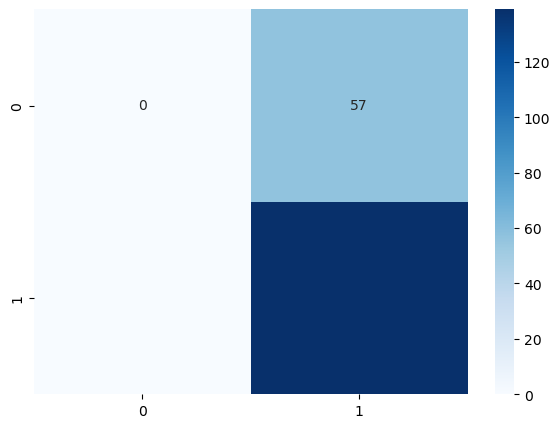

In [49]:
# Plotting the heatmap for visualizing the confusion matrix.

plt.figure(figsize=( 7,5))
sns.heatmap(confusionMatrix,cmap="Blues",annot=True)

## Task 6 : Parmeter Tuning and Optimization



In [50]:
# Import GridSearch CV for the hyperparameter Tuning.
from sklearn.model_selection import GridSearchCV

In [64]:
parameters={
    "kernel":["linear","poly","rbf"],}

In [65]:
parameters


{'kernel': ['linear', 'poly', 'rbf']}

In [66]:
svc = SVC()
classifier = GridSearchCV(svc,param_grid=parameters,scoring="accuracy",cv=5)

In [67]:
classifier.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [69]:
classifier.best_params_

{'kernel': 'linear'}

# Task 7 : Comparison and Analysis

### 1. Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).

In [88]:
from sklearn.metrics import accuracy_score,precision_score,f1_score

In [93]:
kernels =  ["poly","linear","rbf"]

kernel_results = {}

for kernel in kernels:
    svcModel = SVC(kernel=kernel,random_state=7)
    svcModel.fit(train_x,train_y)
    predictions = svcModel.predict(test_x)

    kernel_accuracy = accuracy_score(test_y,predictions)
   

    kernel_results[kernel] = {
    "Accuracy":kernel_accuracy,
    
    }


In [94]:
kernel_results

{'poly': {'Accuracy': 0.7091836734693877},
 'linear': {'Accuracy': 0.7091836734693877},
 'rbf': {'Accuracy': 0.7091836734693877}}

### 2.Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results?

### **Strengths of SVM for the Mushroom Dataset:**
- **Good with High-Dimensional Data**: SVM works well even with many features.
- **Effective at Separating Classes**: SVM can create a clear boundary between edible and poisonous mushrooms.
- **Handles Non-Linear Data**: Using different kernels, SVM can deal with complex relationships in the data.
- **Resistant to Outliers**: SVM can be adjusted to minimize the impact of outliers.

### **Weaknesses of SVM for the Mushroom Dataset:**
- **Needs Numeric Data**: Mushroom features are categorical, so they need to be converted to numbers, which can increase complexity.
- **Requires Feature Scaling**: Without scaling, some features might dominate others, leading to poor results.
- **Time-Consuming**: Training SVM can be slow, especially with complex data.
- **Hard to Interpret**: SVMs, especially with non-linear kernels, are difficult to understand an


### 3. Discuss practical implications of SVM in real-world classification tasks?
### **Practical Implications of SVM in Real-World Classification:**

- **High Accuracy**: SVMs often deliver strong performance in classification tasks, making them reliable for critical applications like spam detection, image recognition, and bioinformatics.
- **Versatility**: With different kernels, SVMs can handle both linear and non-linear data, making them adaptable to various problem types.
- **Scalability Issues**: SVMs can struggle with very large datasets, leading to long training times and high memory usage.
- **Interpretability**: SVM models, particularly with non-linear kernels, are less interpretable, which can be a downside in fields where understanding decisions is important.
- **Sensitive to Feature Scaling**: Proper preprocessing is essential for SVM to perform well, as it requires features to be scaled corretation.
